In [349]:
import pandas as pd
import numpy as np
import warnings as wn

wn.simplefilter( "ignore" )

In [350]:
loc_lbl = r"D:\FacundoTorraca\Documents\TP2_Machine_Learning\Labels"

In [351]:
loc_ftr = r"D:\FacundoTorraca\Documents\TP2_Machine_Learning\Features\ftr_ins"

In [352]:
ins_lb = pd.read_csv( loc_lbl + "\\ins_lb.csv", dtype = {"obs_18_20":"bool", "obs_21_23":"bool", "obs_24_26":"bool"} )

### Filtro de manera que tenga los datos necesarios

In [353]:
rh_18_20 = pd.read_csv( "D:\FacundoTorraca\Documents\TP2_Machine_Learning\Training Sets\ins_18_20.csv" ); rh_18_20 = rh_18_20["ref_hash"].drop_duplicates().tolist()
rh_21_23 = pd.read_csv( "D:\FacundoTorraca\Documents\TP2_Machine_Learning\Training Sets\ins_21_23.csv" ); rh_21_23 = rh_21_23["ref_hash"].drop_duplicates().tolist()

In [354]:
set_trn = ins_lb.loc[ ins_lb["ref_hash"].isin( rh_18_20 ), ["ref_hash", "21_23_sc", "obs_21_23"] ]
set_tst = ins_lb.loc[ ins_lb["ref_hash"].isin( rh_21_23 ), ["ref_hash", "24_26_sc", "obs_24_26"] ]

t_lim = 259200; max_t = 3800
set_trn_loc = pd.concat( [ set_trn.loc[ set_trn["21_23_sc"] < t_lim ], set_trn.loc[ set_trn["21_23_sc"] == t_lim ].reset_index( drop = True ).loc[: max_t] ], axis = 0 ).sample(frac=1).reset_index(drop=True)
set_tst_loc = pd.concat( [ set_tst.loc[ set_tst["24_26_sc"] < t_lim ], set_tst.loc[ set_tst["24_26_sc"] == t_lim ].reset_index( drop = True ).loc[: max_t] ], axis = 0 ).sample(frac=1).reset_index(drop=True)

### Creamos los Train/Test

In [355]:
Z = set_tst[ ["ref_hash"] ] #Datos test
W = set_tst[ ["ref_hash","24_26_sc", "obs_24_26"] ] #Label test

In [356]:
X = set_trn[ ["ref_hash"] ] #Datos train
Y = set_trn[ ["ref_hash","21_23_sc", "obs_21_23"] ] #Label train

In [357]:
Z_loc = set_tst_loc[ ["ref_hash"] ] #Datos test reducido
W_loc = set_tst_loc[ ["ref_hash","24_26_sc","obs_24_26"] ] #Label test reducido

In [358]:
X_loc = set_trn_loc[ ["ref_hash"] ] #Datos train reducido
Y_loc = set_trn_loc[ ["ref_hash","21_23_sc","obs_21_23"] ] #Label train reducido

# <span style="color:orange">  Preparo los datos para predecir </span>
Con los datos 21-23 predecimos "24-26_sc"

In [387]:
Z_var = Z_loc
W_var = W_loc

### Agregamos los features 

In [388]:
ftr_01_Z = pd.read_csv( loc_ftr + "\\sin_hour_21_23.csv" ); Z_var = Z_var.merge( ftr_01_Z, how = "inner", on = "ref_hash" ) 
ftr_02_Z = pd.read_csv( loc_ftr + "\\cant_ins_21_23.csv" ); Z_var = Z_var.merge( ftr_02_Z, how = "inner", on = "ref_hash" ) 
ftr_03_Z = pd.read_csv( loc_ftr + "\\cins_imp_21_23.csv" ); Z_var = Z_var.merge( ftr_03_Z, how = "inner", on = "ref_hash" ) 
ftr_04_Z = pd.read_csv( loc_ftr + "\\cant_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_04_Z, how = "inner", on = "ref_hash" )
ftr_05_Z = pd.read_csv( loc_ftr + "\\cant_auc_21_23.csv" ); Z_var = Z_var.merge( ftr_05_Z, how = "inner", on = "ref_hash" ) #FeaturesWorking
ftr_06_Z = pd.read_csv( loc_ftr + "\\wifi_ins_21_23.csv" ); Z_var = Z_var.merge( ftr_06_Z, how = "inner", on = "ref_hash" )
ftr_07_Z = pd.read_csv( loc_ftr + "\\main_app_21_23.csv" ); Z_var = Z_var.merge( ftr_07_Z, how = "inner", on = "ref_hash" ) #FeaturesWorking 
ftr_08_Z = pd.read_csv( loc_ftr + "\\type_ins_21_23.csv" ); Z_var = Z_var.merge( ftr_08_Z, how = "inner", on = "ref_hash" ) 
ftr_09_Z = pd.read_csv( loc_ftr + "\\ref_type_21_23.csv" ); Z_var = Z_var.merge( ftr_09_Z, how = "inner", on = "ref_hash" ) 
ftr_10_Z = pd.read_csv( loc_ftr + "\\ip_encod_21_23.csv" ); Z_var = Z_var.merge( ftr_10_Z, how = "inner", on = "ref_hash" ) 
ftr_11_Z = pd.read_csv( loc_ftr + "\\frst_ins_21_23.csv" ); Z_var = Z_var.merge( ftr_11_Z, how = "inner", on = "ref_hash" ) #FeaturesWorking
ftr_12_Z = pd.read_csv( loc_ftr + "\\cevt_atr_21_23.csv" ); Z_var = Z_var.merge( ftr_12_Z, how = "inner", on = "ref_hash" )
ftr_13_Z = pd.read_csv( loc_ftr + "\\kind_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_13_Z, how = "inner", on = "ref_hash" )
ftr_14_Z = pd.read_csv( loc_ftr + "\\frst_auc_21_23.csv" ); Z_var = Z_var.merge( ftr_14_Z, how = "inner", on = "ref_hash" ) #FeaturesWorking
ftr_15_Z = pd.read_csv( loc_ftr + "\\ins_ngme_21_23.csv" ); Z_var = Z_var.merge( ftr_15_Z, how = "inner", on = "ref_hash" )
ftr_16_Z = pd.read_csv( loc_ftr + "\\ins_mrme_21_23.csv" ); Z_var = Z_var.merge( ftr_16_Z, how = "inner", on = "ref_hash" )
ftr_17_Z = pd.read_csv( loc_ftr + "\\ins_afme_21_23.csv" ); Z_var = Z_var.merge( ftr_17_Z, how = "inner", on = "ref_hash" )
ftr_18_Z = pd.read_csv( loc_ftr + "\\ins_mdme_21_23.csv" ); Z_var = Z_var.merge( ftr_18_Z, how = "inner", on = "ref_hash" )
ftr_19_Z = pd.read_csv( loc_ftr + "\\auc_ngme_21_23.csv" ); Z_var = Z_var.merge( ftr_19_Z, how = "inner", on = "ref_hash" )
ftr_20_Z = pd.read_csv( loc_ftr + "\\auc_mrme_21_23.csv" ); Z_var = Z_var.merge( ftr_20_Z, how = "inner", on = "ref_hash" )
ftr_21_Z = pd.read_csv( loc_ftr + "\\auc_afme_21_23.csv" ); Z_var = Z_var.merge( ftr_21_Z, how = "inner", on = "ref_hash" )
ftr_22_Z = pd.read_csv( loc_ftr + "\\auc_mdme_21_23.csv" ); Z_var = Z_var.merge( ftr_22_Z, how = "inner", on = "ref_hash" )
ftr_23_Z = pd.read_csv( loc_ftr + "\\clk_ngme_21_23.csv" ); Z_var = Z_var.merge( ftr_23_Z, how = "inner", on = "ref_hash" )
ftr_24_Z = pd.read_csv( loc_ftr + "\\clk_mrme_21_23.csv" ); Z_var = Z_var.merge( ftr_24_Z, how = "inner", on = "ref_hash" )
ftr_25_Z = pd.read_csv( loc_ftr + "\\clk_afme_21_23.csv" ); Z_var = Z_var.merge( ftr_25_Z, how = "inner", on = "ref_hash" )
ftr_26_Z = pd.read_csv( loc_ftr + "\\clk_mdme_21_23.csv" ); Z_var = Z_var.merge( ftr_26_Z, how = "inner", on = "ref_hash" )
#ftr_27_Z = pd.read_csv( loc_ftr + "\\evt_ngme_21_23.csv" ); Z_var = Z_var.merge( ftr_27_Z, how = "inner", on = "ref_hash" )
#ftr_28_Z = pd.read_csv( loc_ftr + "\\evt_mrme_21_23.csv" ); Z_var = Z_var.merge( ftr_28_Z, how = "inner", on = "ref_hash" )
#ftr_29_Z = pd.read_csv( loc_ftr + "\\evt_afme_21_23.csv" ); Z_var = Z_var.merge( ftr_29_Z, how = "inner", on = "ref_hash" )
#ftr_30_Z = pd.read_csv( loc_ftr + "\\evt_mdme_21_23.csv" ); Z_var = Z_var.merge( ftr_30_Z, how = "inner", on = "ref_hash" )
ftr_31_Z = pd.read_csv( loc_ftr + "\\frst_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_31_Z, how = "inner", on = "ref_hash" )
ftr_32_Z = pd.read_csv( loc_ftr + "\\hr_f_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_32_Z, how = "inner", on = "ref_hash" )
ftr_33_Z = pd.read_csv( loc_ftr + "\\last_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_33_Z, how = "inner", on = "ref_hash" )
ftr_34_Z = pd.read_csv( loc_ftr + "\\m1oh_auc_21_23.csv" ); Z_var = Z_var.merge( ftr_34_Z, how = "inner", on = "ref_hash" )
ftr_35_Z = pd.read_csv( loc_ftr + "\\ins_dsua_21_23.csv" ); Z_var = Z_var.merge( ftr_35_Z, how = "inner", on = "ref_hash" ) #FeaturesWorking
ftr_36_Z = pd.read_csv( loc_ftr + "\\frst_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_36_Z, how = "inner", on = "ref_hash" ) #FeaturesWorking
ftr_37_Z = pd.read_csv( loc_ftr + "\\atbt_ins_21_23.csv" ); Z_var = Z_var.merge( ftr_37_Z, how = "inner", on = "ref_hash" )
ftr_38_Z = pd.read_csv( loc_ftr + "\\cevt_atr_21_23.csv" ); Z_var = Z_var.merge( ftr_38_Z, how = "inner", on = "ref_hash" )
ftr_39_Z = pd.read_csv( loc_ftr + "\\mapp_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_39_Z, how = "inner", on = "ref_hash" )
ftr_40_Z = pd.read_csv( loc_ftr + "\\wifi_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_40_Z, how = "inner", on = "ref_hash" )
ftr_41_Z = pd.read_csv( loc_ftr + "\\frst_clk_21_23.csv" ); Z_var = Z_var.merge( ftr_41_Z, how = "inner", on = "ref_hash" )
ftr_42_Z = pd.read_csv( loc_ftr + "\\ins_ngoh_21_23.csv" ); Z_var = Z_var.merge( ftr_42_Z, how = "inner", on = "ref_hash" )
ftr_43_Z = pd.read_csv( loc_ftr + "\\ins_mroh_21_23.csv" ); Z_var = Z_var.merge( ftr_43_Z, how = "inner", on = "ref_hash" )
ftr_44_Z = pd.read_csv( loc_ftr + "\\ins_afoh_21_23.csv" ); Z_var = Z_var.merge( ftr_44_Z, how = "inner", on = "ref_hash" )
ftr_45_Z = pd.read_csv( loc_ftr + "\\ins_mdoh_21_23.csv" ); Z_var = Z_var.merge( ftr_45_Z, how = "inner", on = "ref_hash" )
ftr_46_Z = pd.read_csv( loc_ftr + "\\auc_ngoh_21_23.csv" ); Z_var = Z_var.merge( ftr_46_Z, how = "inner", on = "ref_hash" )
ftr_47_Z = pd.read_csv( loc_ftr + "\\auc_mroh_21_23.csv" ); Z_var = Z_var.merge( ftr_47_Z, how = "inner", on = "ref_hash" )
ftr_48_Z = pd.read_csv( loc_ftr + "\\auc_afoh_21_23.csv" ); Z_var = Z_var.merge( ftr_48_Z, how = "inner", on = "ref_hash" )
ftr_49_Z = pd.read_csv( loc_ftr + "\\auc_mdoh_21_23.csv" ); Z_var = Z_var.merge( ftr_49_Z, how = "inner", on = "ref_hash" )
ftr_50_Z = pd.read_csv( loc_ftr + "\\clk_ngoh_21_23.csv" ); Z_var = Z_var.merge( ftr_50_Z, how = "inner", on = "ref_hash" )
ftr_51_Z = pd.read_csv( loc_ftr + "\\clk_mroh_21_23.csv" ); Z_var = Z_var.merge( ftr_51_Z, how = "inner", on = "ref_hash" )
ftr_52_Z = pd.read_csv( loc_ftr + "\\clk_afoh_21_23.csv" ); Z_var = Z_var.merge( ftr_52_Z, how = "inner", on = "ref_hash" )
ftr_53_Z = pd.read_csv( loc_ftr + "\\clk_mdoh_21_23.csv" ); Z_var = Z_var.merge( ftr_53_Z, how = "inner", on = "ref_hash" )
ftr_54_Z = pd.read_csv( loc_ftr + "\\evt_ngoh_21_23.csv" ); Z_var = Z_var.merge( ftr_54_Z, how = "inner", on = "ref_hash" )
ftr_55_Z = pd.read_csv( loc_ftr + "\\evt_mroh_21_23.csv" ); Z_var = Z_var.merge( ftr_55_Z, how = "inner", on = "ref_hash" )
ftr_56_Z = pd.read_csv( loc_ftr + "\\evt_afoh_21_23.csv" ); Z_var = Z_var.merge( ftr_56_Z, how = "inner", on = "ref_hash" )
ftr_57_Z = pd.read_csv( loc_ftr + "\\evt_mdoh_21_23.csv" ); Z_var = Z_var.merge( ftr_57_Z, how = "inner", on = "ref_hash" )

# <span style="color:orange">  Preparo los datos para entrenar </span>

Con los datos 18-20 + "21-23_sc" entrenamos

In [389]:
Y_var = Y_loc
X_var = X_loc

### Agregamos los features

In [390]:
ftr_01_X = pd.read_csv( loc_ftr + "\\sin_hour_18_20.csv" ); X_var = X_var.merge( ftr_01_X, how = "inner", on = "ref_hash" ) 
ftr_02_X = pd.read_csv( loc_ftr + "\\cant_ins_18_20.csv" ); X_var = X_var.merge( ftr_02_X, how = "inner", on = "ref_hash" ) 
ftr_03_X = pd.read_csv( loc_ftr + "\\cins_imp_18_20.csv" ); X_var = X_var.merge( ftr_03_X, how = "inner", on = "ref_hash" ) 
ftr_04_X = pd.read_csv( loc_ftr + "\\cant_evt_18_20.csv" ); X_var = X_var.merge( ftr_04_X, how = "inner", on = "ref_hash" )
ftr_05_X = pd.read_csv( loc_ftr + "\\cant_auc_18_20.csv" ); X_var = X_var.merge( ftr_05_X, how = "inner", on = "ref_hash" ) #FeaturesWorking
ftr_06_X = pd.read_csv( loc_ftr + "\\wifi_ins_18_20.csv" ); X_var = X_var.merge( ftr_06_X, how = "inner", on = "ref_hash" )
ftr_07_X = pd.read_csv( loc_ftr + "\\main_app_18_20.csv" ); X_var = X_var.merge( ftr_07_X, how = "inner", on = "ref_hash" ) #FeaturesWorking
ftr_08_X = pd.read_csv( loc_ftr + "\\type_ins_18_20.csv" ); X_var = X_var.merge( ftr_08_X, how = "inner", on = "ref_hash" )
ftr_09_X = pd.read_csv( loc_ftr + "\\ref_type_18_20.csv" ); X_var = X_var.merge( ftr_09_X, how = "inner", on = "ref_hash" ) 
ftr_10_X = pd.read_csv( loc_ftr + "\\ip_encod_18_20.csv" ); X_var = X_var.merge( ftr_10_X, how = "inner", on = "ref_hash" ) 
ftr_11_X = pd.read_csv( loc_ftr + "\\frst_ins_18_20.csv" ); X_var = X_var.merge( ftr_11_X, how = "inner", on = "ref_hash" ) #FeaturesWorking
ftr_12_X = pd.read_csv( loc_ftr + "\\cevt_atr_18_20.csv" ); X_var = X_var.merge( ftr_12_X, how = "inner", on = "ref_hash" ) 
ftr_13_X = pd.read_csv( loc_ftr + "\\kind_evt_18_20.csv" ); X_var = X_var.merge( ftr_13_X, how = "inner", on = "ref_hash" )
ftr_14_X = pd.read_csv( loc_ftr + "\\frst_auc_18_20.csv" ); X_var = X_var.merge( ftr_14_X, how = "inner", on = "ref_hash" ) #FeaturesWorking
ftr_15_X = pd.read_csv( loc_ftr + "\\ins_ngme_18_20.csv" ); X_var = X_var.merge( ftr_15_X, how = "inner", on = "ref_hash" )
ftr_16_X = pd.read_csv( loc_ftr + "\\ins_mrme_18_20.csv" ); X_var = X_var.merge( ftr_16_X, how = "inner", on = "ref_hash" )
ftr_17_X = pd.read_csv( loc_ftr + "\\ins_afme_18_20.csv" ); X_var = X_var.merge( ftr_17_X, how = "inner", on = "ref_hash" )
ftr_18_X = pd.read_csv( loc_ftr + "\\ins_mdme_18_20.csv" ); X_var = X_var.merge( ftr_18_X, how = "inner", on = "ref_hash" )
ftr_19_X = pd.read_csv( loc_ftr + "\\auc_ngme_18_20.csv" ); X_var = X_var.merge( ftr_19_X, how = "inner", on = "ref_hash" )
ftr_20_X = pd.read_csv( loc_ftr + "\\auc_mrme_18_20.csv" ); X_var = X_var.merge( ftr_20_X, how = "inner", on = "ref_hash" )
ftr_21_X = pd.read_csv( loc_ftr + "\\auc_afme_18_20.csv" ); X_var = X_var.merge( ftr_21_X, how = "inner", on = "ref_hash" )
ftr_22_X = pd.read_csv( loc_ftr + "\\auc_mdme_18_20.csv" ); X_var = X_var.merge( ftr_22_X, how = "inner", on = "ref_hash" )
ftr_23_X = pd.read_csv( loc_ftr + "\\clk_ngme_18_20.csv" ); X_var = X_var.merge( ftr_23_X, how = "inner", on = "ref_hash" )
ftr_24_X = pd.read_csv( loc_ftr + "\\clk_mrme_18_20.csv" ); X_var = X_var.merge( ftr_24_X, how = "inner", on = "ref_hash" )
ftr_25_X = pd.read_csv( loc_ftr + "\\clk_afme_18_20.csv" ); X_var = X_var.merge( ftr_25_X, how = "inner", on = "ref_hash" )
ftr_26_X = pd.read_csv( loc_ftr + "\\clk_mdme_18_20.csv" ); X_var = X_var.merge( ftr_26_X, how = "inner", on = "ref_hash" )
#ftr_27_X = pd.read_csv( loc_ftr + "\\evt_ngme_18_20.csv" ); X_var = X_var.merge( ftr_27_X, how = "inner", on = "ref_hash" )
#ftr_28_X = pd.read_csv( loc_ftr + "\\evt_mrme_18_20.csv" ); X_var = X_var.merge( ftr_28_X, how = "inner", on = "ref_hash" )
#ftr_29_X = pd.read_csv( loc_ftr + "\\evt_afme_18_20.csv" ); X_var = X_var.merge( ftr_29_X, how = "inner", on = "ref_hash" )
#ftr_30_X = pd.read_csv( loc_ftr + "\\evt_mdme_18_20.csv" ); X_var = X_var.merge( ftr_30_X, how = "inner", on = "ref_hash" )
ftr_31_X = pd.read_csv( loc_ftr + "\\frst_evt_18_20.csv" ); X_var = X_var.merge( ftr_31_X, how = "inner", on = "ref_hash" )
ftr_32_X = pd.read_csv( loc_ftr + "\\hr_f_evt_18_20.csv" ); X_var = X_var.merge( ftr_32_X, how = "inner", on = "ref_hash" )
ftr_33_X = pd.read_csv( loc_ftr + "\\last_evt_18_20.csv" ); X_var = X_var.merge( ftr_33_X, how = "inner", on = "ref_hash" )
ftr_34_X = pd.read_csv( loc_ftr + "\\m1oh_auc_18_20.csv" ); X_var = X_var.merge( ftr_34_X, how = "inner", on = "ref_hash" )
ftr_35_X = pd.read_csv( loc_ftr + "\\ins_dsua_18_20.csv" ); X_var = X_var.merge( ftr_35_X, how = "inner", on = "ref_hash" ) #FeaturesWorking
ftr_36_X = pd.read_csv( loc_ftr + "\\frst_evt_18_20.csv" ); X_var = X_var.merge( ftr_36_X, how = "inner", on = "ref_hash" ) #FeaturesWorking
ftr_37_X = pd.read_csv( loc_ftr + "\\atbt_ins_18_20.csv" ); X_var = X_var.merge( ftr_37_X, how = "inner", on = "ref_hash" )
ftr_38_X = pd.read_csv( loc_ftr + "\\cevt_atr_18_20.csv" ); X_var = X_var.merge( ftr_38_X, how = "inner", on = "ref_hash" )
ftr_39_X = pd.read_csv( loc_ftr + "\\mapp_evt_18_20.csv" ); X_var = X_var.merge( ftr_39_X, how = "inner", on = "ref_hash" )
ftr_40_X = pd.read_csv( loc_ftr + "\\wifi_evt_18_20.csv" ); X_var = X_var.merge( ftr_40_X, how = "inner", on = "ref_hash" )
ftr_41_X = pd.read_csv( loc_ftr + "\\frst_clk_18_20.csv" ); X_var = X_var.merge( ftr_41_X, how = "inner", on = "ref_hash" )
ftr_42_X = pd.read_csv( loc_ftr + "\\ins_ngoh_18_20.csv" ); X_var = X_var.merge( ftr_42_X, how = "inner", on = "ref_hash" )
ftr_43_X = pd.read_csv( loc_ftr + "\\ins_mroh_18_20.csv" ); X_var = X_var.merge( ftr_43_X, how = "inner", on = "ref_hash" )
ftr_44_X = pd.read_csv( loc_ftr + "\\ins_afoh_18_20.csv" ); X_var = X_var.merge( ftr_44_X, how = "inner", on = "ref_hash" )
ftr_45_X = pd.read_csv( loc_ftr + "\\ins_mdoh_18_20.csv" ); X_var = X_var.merge( ftr_45_X, how = "inner", on = "ref_hash" )
ftr_46_X = pd.read_csv( loc_ftr + "\\auc_ngoh_18_20.csv" ); X_var = X_var.merge( ftr_46_X, how = "inner", on = "ref_hash" )
ftr_47_X = pd.read_csv( loc_ftr + "\\auc_mroh_18_20.csv" ); X_var = X_var.merge( ftr_47_X, how = "inner", on = "ref_hash" )
ftr_48_X = pd.read_csv( loc_ftr + "\\auc_afoh_18_20.csv" ); X_var = X_var.merge( ftr_48_X, how = "inner", on = "ref_hash" )
ftr_49_X = pd.read_csv( loc_ftr + "\\auc_mdoh_18_20.csv" ); X_var = X_var.merge( ftr_49_X, how = "inner", on = "ref_hash" )
ftr_50_X = pd.read_csv( loc_ftr + "\\clk_ngoh_18_20.csv" ); X_var = X_var.merge( ftr_50_X, how = "inner", on = "ref_hash" )
ftr_51_X = pd.read_csv( loc_ftr + "\\clk_mroh_18_20.csv" ); X_var = X_var.merge( ftr_51_X, how = "inner", on = "ref_hash" )
ftr_52_X = pd.read_csv( loc_ftr + "\\clk_afoh_18_20.csv" ); X_var = X_var.merge( ftr_52_X, how = "inner", on = "ref_hash" )
ftr_53_X = pd.read_csv( loc_ftr + "\\clk_mdoh_18_20.csv" ); X_var = X_var.merge( ftr_53_X, how = "inner", on = "ref_hash" )
ftr_54_X = pd.read_csv( loc_ftr + "\\evt_ngoh_18_20.csv" ); X_var = X_var.merge( ftr_54_X, how = "inner", on = "ref_hash" )
ftr_55_X = pd.read_csv( loc_ftr + "\\evt_mroh_18_20.csv" ); X_var = X_var.merge( ftr_55_X, how = "inner", on = "ref_hash" )
ftr_56_X = pd.read_csv( loc_ftr + "\\evt_afoh_18_20.csv" ); X_var = X_var.merge( ftr_56_X, how = "inner", on = "ref_hash" )
ftr_57_X = pd.read_csv( loc_ftr + "\\evt_mdoh_18_20.csv" ); X_var = X_var.merge( ftr_57_X, how = "inner", on = "ref_hash" )

## Reacomodamos los SC para que queden junto a su ref_hash correspondiente

In [391]:
X_var = X_var.merge( Y_var, how = "inner", on = "ref_hash" ); Y_var = X_var[ ["21_23_sc","obs_21_23"] ]
Z_var = Z_var.merge( W_var, how = "inner", on = "ref_hash" ); W_var = Z_var[ ["24_26_sc","obs_24_26"] ]

## Dropeamos algunos valores maximos (No convirtieron)

Los "loc" es el DataFrame de entrenamiento recortado con 200 valores maximos (No conversion) y 3848 valores que convirtieron

In [392]:
X_var = X_var.drop( ["ref_hash", "21_23_sc","obs_21_23"], axis = 1 )
Z_var = Z_var.drop( ["ref_hash", "24_26_sc","obs_24_26"], axis = 1 )

# Prediccion con <span style="color:green"> *XGBoost*</span> -  <span style="color:orange"> *Classifier*</span>

In [393]:
from xgboost import XGBClassifier

Y_var_clf = Y_var.drop( ["21_23_sc"], axis = 1 )["obs_21_23"].apply( lambda x: int(x) ).to_frame()
W_var_clf = W_var.drop( ["24_26_sc"], axis = 1 )["obs_24_26"].apply( lambda x: int(x) ).to_frame()

In [394]:
prm = { "max_depth": 3, "learning_rate":0.101, "n_estimators":500, "objective":'binary:logistic', "booster":'gbtree', "colsample_bytree" : 0.3 }

classfier = XGBClassifier( **prm )

In [395]:
mdl_clf = classfier.fit( X_var, Y_var_clf )

In [396]:
prd_clf = mdl_clf.predict( Z_var )
predictions = [round(value) for value in prd_clf]

## Calculamos el Accuracy

In [397]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score( W_var_clf, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0) )

Accuracy: 57.10%


In [398]:
(W_var_clf["obs_24_26"] == prd_clf).sum()

4288

## Ploteamos el Feature Importance

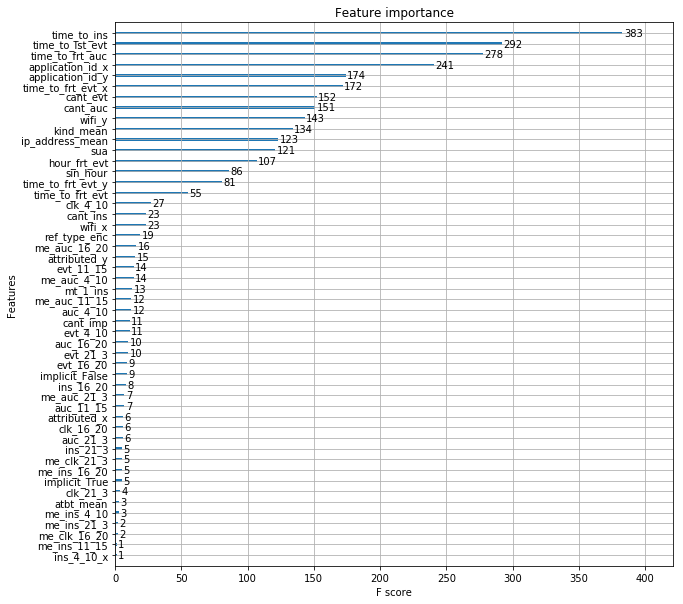

In [399]:
import matplotlib.pyplot as plt
import xgboost as xgb
xgb.plot_importance(mdl_clf)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()